# Fashion MNIST 

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from keras.datasets import fashion_mnist
# Getting the dataset
(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()

In [0]:
labels = {0 :"T-shirt/top ", 1 :"Trouser ", 2 :"Pullover ", 3 :"Dress ", 4 :"Coat ", 5 :"Sandal ", 6 :"Shirt ", 7 :"Sneaker ", 8 :"Bag ", 9 :"Ankle boot"}

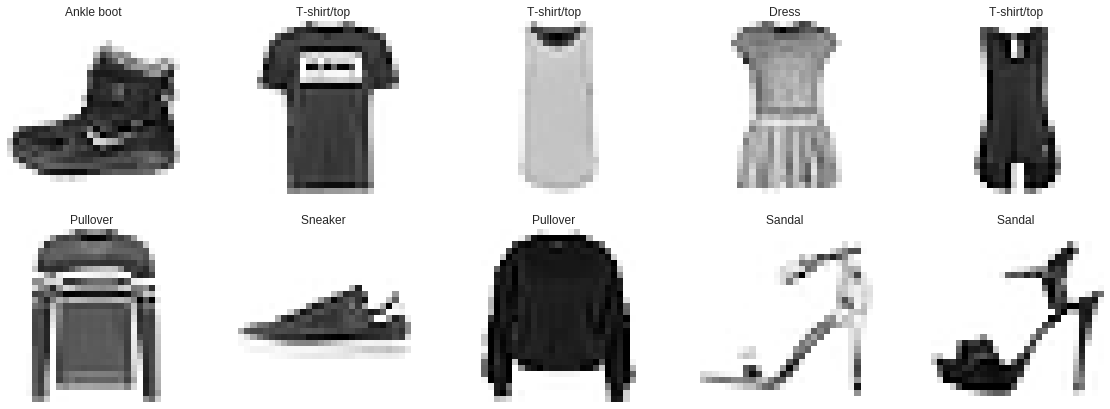

In [25]:
# Visualizing Some Images
fig = plt.figure(figsize=(20,7))
for i in range(10):
  ax = fig.add_subplot(2, 5, i+1, xticks = [], yticks = [])
  ax.imshow(x_train[i])
  ax.set_title(labels[np.argmax(y_train[i])])

In [0]:
# Normalize the image values
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [62]:
x_valid, x_train = x_train[:10000], x_train[10000:]
y_valid, y_train = y_train[:10000], y_train[10000:]

print(x_valid.shape)
print(x_train.shape)

(10000, 28, 28)
(50000, 28, 28)


# Classification with Simple Deep NN

In [0]:
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential

In [34]:
# Building the Model
model = Sequential()
model.add(Flatten(input_shape = x_train[0].shape))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
__________

In [0]:
 model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [36]:
model.fit(x_train, y_train, epochs= 25, batch_size = 64, validation_data= (x_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 6s 113us/step - loss: 1.0934 - acc: 0.5549 - val_loss: 0.6611 - val_acc: 0.7529
Epoch 2/25
50000/50000 [==============================] - 5s 107us/step - loss: 0.6526 - acc: 0.7552 - val_loss: 0.5492 - val_acc: 0.7962
Epoch 3/25
50000/50000 [==============================] - 5s 107us/step - loss: 0.5464 - acc: 0.8007 - val_loss: 0.4823 - val_acc: 0.8206
Epoch 4/25
50000/50000 [==============================] - 5s 106us/step - loss: 0.4909 - acc: 0.8253 - val_loss: 0.4617 - val_acc: 0.8270
Epoch 5/25
50000/50000 [==============================] - 5s 106us/step - loss: 0.4602 - acc: 0.8373 - val_loss: 0.4882 - val_acc: 0.8244
Epoch 6/25
50000/50000 [==============================] - 5s 107us/step - loss: 0.4443 - acc: 0.8441 - val_loss: 0.4067 - val_acc: 0.8515
Epoch 7/25
50000/50000 [==============================] - 5s 107us/step - loss: 0.4303 - acc: 0.8497 - val_loss: 0.4380 - 

In [42]:
# evaluation
score = model.evaluate(x_test, y_test, verbose = 0)

print("The accuracy for Simple DNN model is {}%".format(score[1]*100))

The accuracy for Simple DNN model is 79.22%


# Classification with CNN

In [0]:
from keras.layers import Conv2D, MaxPooling2D

In [0]:
x_valid_cnn = np.expand_dims(x_valid, axis=3)
x_test_cnn = np.expand_dims(x_test, axis=3)
x_train_cnn = np.expand_dims(x_train, axis=3)

In [53]:
cnn_model = Sequential()
cnn_model.add(Conv2D(16, input_shape = (28, 28, 1), kernel_size=2, strides=(1, 1), padding='same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(32, kernel_size=2, strides=(1, 1), padding='same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation = 'relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(256, activation = 'relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(64, activation = 'relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(10, activation = 'softmax'))
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               803328    
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
__________

In [0]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [65]:
cnn_model.fit(x_train_cnn, y_train, epochs= 25, batch_size = 64, validation_data= (x_valid_cnn, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 9s 177us/step - loss: 0.6171 - acc: 0.7778 - val_loss: 0.3805 - val_acc: 0.8664
Epoch 2/25
50000/50000 [==============================] - 8s 164us/step - loss: 0.3796 - acc: 0.8708 - val_loss: 0.3189 - val_acc: 0.8861
Epoch 3/25
50000/50000 [==============================] - 8s 164us/step - loss: 0.3383 - acc: 0.8845 - val_loss: 0.3010 - val_acc: 0.8958
Epoch 4/25
50000/50000 [==============================] - 8s 164us/step - loss: 0.3227 - acc: 0.8924 - val_loss: 0.3185 - val_acc: 0.8894
Epoch 5/25
50000/50000 [==============================] - 8s 165us/step - loss: 0.3082 - acc: 0.8966 - val_loss: 0.2936 - val_acc: 0.8986
Epoch 6/25
50000/50000 [==============================] - 8s 165us/step - loss: 0.2967 - acc: 0.8998 - val_loss: 0.3269 - val_acc: 0.8876
Epoch 7/25
50000/50000 [==============================] - 8s 164us/step - loss: 0.2924 - acc: 0.9017 - val_loss: 0.3295 - 

In [66]:
# Modifiying in the Architecture
cnn_model = Sequential()
cnn_model.add(Conv2D(16, input_shape = (28, 28, 1), kernel_size=2, strides=(1, 1), padding='same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation = 'relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(64, activation = 'relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(10, activation = 'softmax'))
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               1606144   
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
__________

In [0]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [68]:
cnn_model.fit(x_train_cnn, y_train, epochs= 25, batch_size = 64, validation_data= (x_valid_cnn, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 8s 158us/step - loss: 0.6069 - acc: 0.7814 - val_loss: 0.3697 - val_acc: 0.8665
Epoch 2/25
50000/50000 [==============================] - 7s 144us/step - loss: 0.3545 - acc: 0.8776 - val_loss: 0.3091 - val_acc: 0.8926
Epoch 3/25
50000/50000 [==============================] - 7s 143us/step - loss: 0.3094 - acc: 0.8943 - val_loss: 0.2752 - val_acc: 0.9036
Epoch 4/25
50000/50000 [==============================] - 7s 143us/step - loss: 0.2891 - acc: 0.9016 - val_loss: 0.3487 - val_acc: 0.8771
Epoch 5/25
50000/50000 [==============================] - 7s 144us/step - loss: 0.2752 - acc: 0.9067 - val_loss: 0.3033 - val_acc: 0.9026
Epoch 6/25
50000/50000 [==============================] - 7s 143us/step - loss: 0.2700 - acc: 0.9088 - val_loss: 0.2821 - val_acc: 0.9057
Epoch 7/25
50000/50000 [==============================] - 7s 143us/step - loss: 0.2632 - acc: 0.9109 - val_loss: 0.2808 - 

In [70]:
# evaluation of cnn
score = cnn_model.evaluate(x_test_cnn, y_test, verbose = 0)

print("The accuracy for Simple CNN model is {}%".format(score[1]*100))

The accuracy for Simple CNN model is 89.33%


In [0]:
y_hat = cnn_model.predict(x_test_cnn)

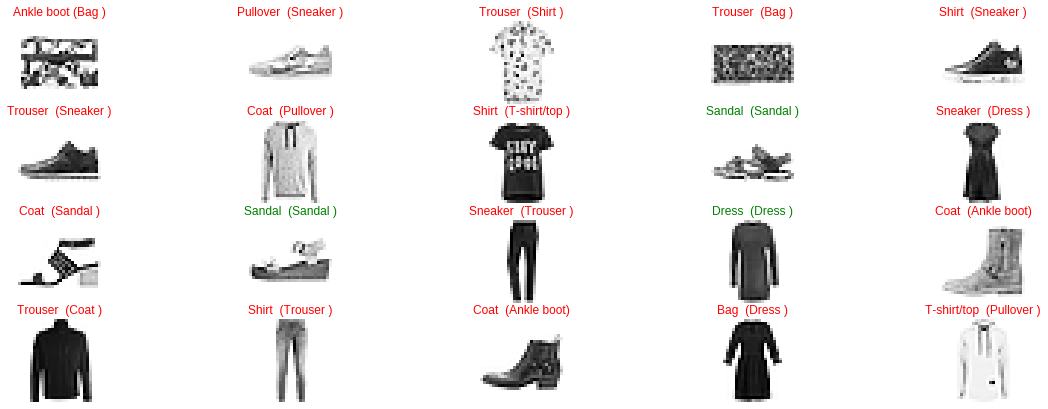

In [78]:
# visualizing Results
fig = plt.figure(figsize=(20,7))
for i in range(20):
  ax = fig.add_subplot(4, 5, i+1, xticks = [], yticks = [])
  ax.imshow(x_train[i])
  pred_label = np.argmax(y_hat[i])
  true_label = np.argmax(y_train[i])
  title = "{} ({})".format(labels[pred_label], labels[true_label] )
  ax.set_title(title, color = ("green" if true_label == pred_label else "red"))